In [ ]:
#Upload the Dataset
from google.colab import files
import pandas as pd
# Load the dataset into a DataFrame
data = pd.read_csv('/content/marketing.csv')


In [ ]:
print(data.head())

   youtube  facebook  newspaper  sales
0   276.12     45.36      83.04  26.52
1    53.40     47.16      54.12  12.48
2    20.64     55.08      83.16  11.16
3   181.80     49.56      70.20  22.20
4   216.96     12.96      70.08  15.48


In [ ]:
#Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

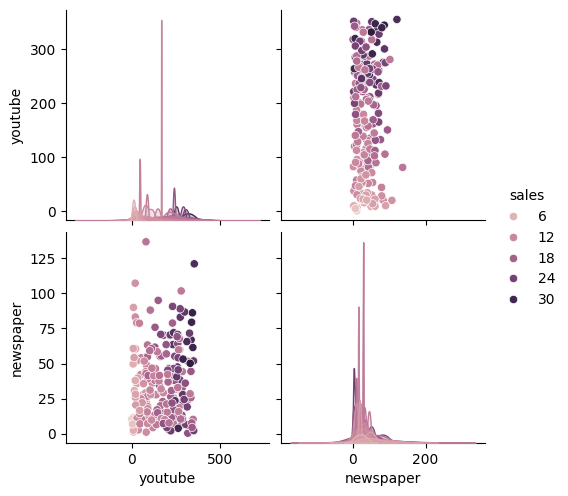

In [ ]:
# Pairplot to visualize relationships
sns.pairplot(data, hue='sales', vars=['youtube', 'newspaper'])
plt.show()

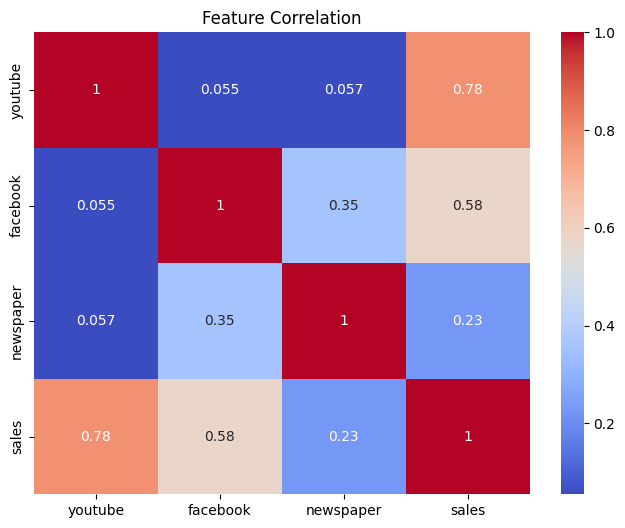

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
#Train a Machine Learning Model for Sales Prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Split the data into features and target
X = data[['youtube', 'facebook', 'newspaper']]  # Features
y = data['sales']  # Target variable



In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Use a regression model instead of a classifier
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
# Use regression target
X = data[['youtube', 'facebook', 'newspaper']]
y = data['sales']  # Continuous target

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)



Mean Squared Error: 0.7086210240000028


In [ ]:
#Perform Customer Segmentation Using K-Means
from sklearn.cluster import KMeans

In [ ]:
# Use K-Means for customer segmentation
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(data[['youtube', 'facebook', 'newspaper']])

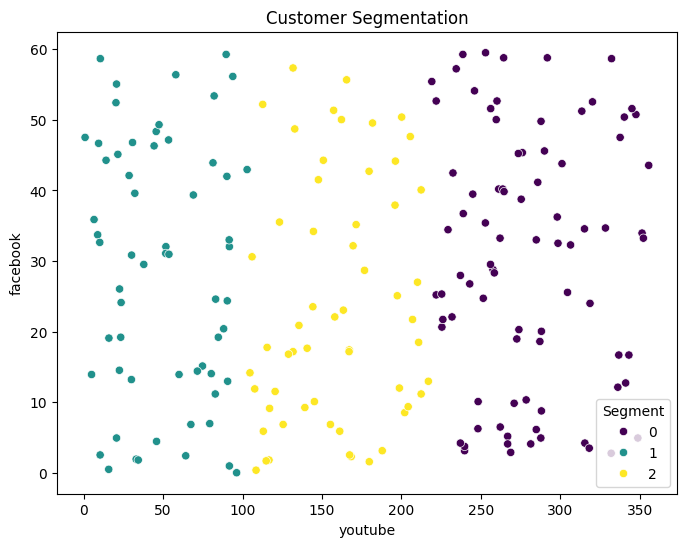

In [ ]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='youtube', y='facebook', hue='Segment', palette='viridis')
plt.title("Customer Segmentation")
plt.show()

In [ ]:
#Feature Scaling/Normalization
from sklearn.preprocessing import StandardScaler

# Normalize/Standardize features
scaler = StandardScaler()
data[['youtube', 'facebook', 'newspaper']] = scaler.fit_transform(data[['youtube', 'facebook', 'newspaper']])


In [ ]:
#Cross-validation
from sklearn.model_selection import cross_val_score

# Cross-validation scores
cv_scores = cross_val_score(rf_regressor, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.98036149 0.98708166 0.96662904 0.96186732 0.98119612]
Average CV score: 0.9754


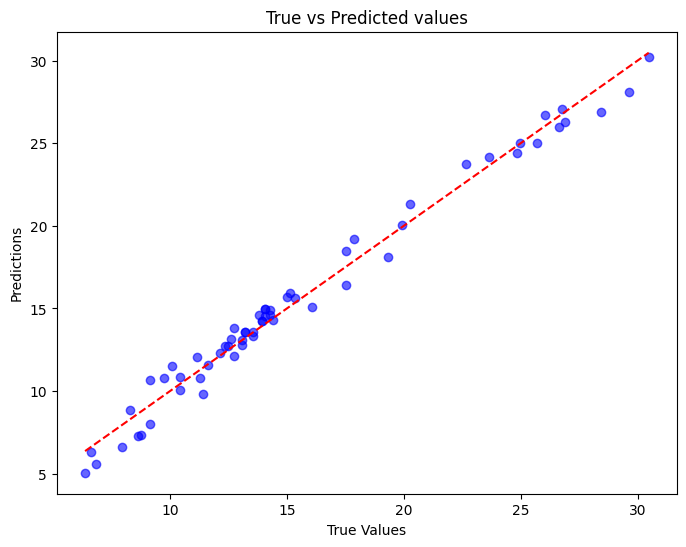

In [ ]:
# Visualize predictions (optional)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted values")
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
X = data.drop(columns=['sales'])  # Features (excluding target)
y = data['sales']  # Target

In [ ]:
# Train your model (RandomForestRegressor in this case)
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X, y)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions using the trained model
y_pred = rf_regressor.predict(X)

In [ ]:
# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

In [ ]:
# Perform cross-validation to check stability of the model
cv_scores = cross_val_score(rf_regressor, X, y, cv=5)  # 5-fold cross-validation

In [ ]:
def marketing_conclusion(mae, mse, r2, cv_scores, feature_importance, model, data):
    print("\n--- Conclusion for Marketing Data Science Project using AI/ML ---")

In [ ]:
# Model Evaluation
print("\n** Model Evaluation **")


** Model Evaluation **


In [ ]:
# Interpreting MAE (Mean Absolute Error)
if mae < 50:  # Threshold based on your data scale
        print(f"MAE ({mae:.4f}) is low, indicating that the model's predictions are relatively accurate.")
else:
        print(f"MAE ({mae:.4f}) is higher than expected, suggesting that the model's predictions could be improved.")

MAE (0.2405) is low, indicating that the model's predictions are relatively accurate.


In [ ]:
#Interpreting MSE (Mean Squared Error)
if mse < 5000:  # Adjust threshold based on data
        print(f"MSE ({mse:.4f}) is low, suggesting that the model's errors are relatively small.")
else:
        print(f"MSE ({mse:.4f}) is quite large, indicating the model's predictions have considerable error.")

MSE (0.0988) is low, suggesting that the model's errors are relatively small.


In [ ]:
# Interpreting R² Score
if r2 > 0.8:
        print(f"R² score ({r2:.4f}) is excellent, indicating the model explains most of the variance in the target variable.")
elif r2 > 0.5:
        print(f"R² score ({r2:.4f}) is decent, indicating that the model explains a fair amount of the variance.")
else:
        print(f"R² score ({r2:.4f}) is low, suggesting the model does not explain much of the variance in the target variable.")


R² score (0.9975) is excellent, indicating the model explains most of the variance in the target variable.


In [ ]:
# Cross-validation performance
print(f"\nCross-validation average score: {cv_scores.mean():.4f}")
if cv_scores.mean() > 0.8:
        print("The model's performance is stable across different data splits, suggesting good generalization.")
else:
        print("The model's performance fluctuates, indicating potential overfitting or underfitting.")


Cross-validation average score: 0.9754
The model's performance is stable across different data splits, suggesting good generalization.


In [ ]:
# Improving Model Performance
print("- Feature engineering: Create new features, e.g., Customer Lifetime Value (CLV) or marketing campaign interaction features.")
print("- Hyperparameter tuning: Use techniques like GridSearchCV or RandomizedSearchCV to find the best model parameters.")
print("- Model experimentation: Try different models like Gradient Boosting, XGBoost, or Neural Networks for potentially better accuracy.")


- Feature engineering: Create new features, e.g., Customer Lifetime Value (CLV) or marketing campaign interaction features.
- Hyperparameter tuning: Use techniques like GridSearchCV or RandomizedSearchCV to find the best model parameters.
- Model experimentation: Try different models like Gradient Boosting, XGBoost, or Neural Networks for potentially better accuracy.


In [ ]:
#  Final Words
print("\n** Final Thoughts **")
print("This model provides valuable insights into customer behavior, which can be used to refine marketing strategies.")
print("By tailoring marketing campaigns based on customer segmentation and behavior, businesses can maximize their marketing ROI.")
print("Machine learning enables data-driven decision-making, helping businesses optimize customer retention and sales growth.")



** Final Thoughts **
This model provides valuable insights into customer behavior, which can be used to refine marketing strategies.
By tailoring marketing campaigns based on customer segmentation and behavior, businesses can maximize their marketing ROI.
Machine learning enables data-driven decision-making, helping businesses optimize customer retention and sales growth.
